In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
file = "../Net_generation_for_electric_power_by_year.csv"
# file = "../Net_generation_for_all_sectors (1).csv"

# Read our Kickstarter data into pandas
df = pd.read_csv(file)
df

,Net generation for electric power,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,https://www.eia.gov/electricity/data/browser/#...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Thu Feb 04 2021 20:30:08 GMT-0700 (Mountain St...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Source: U.S. Energy Information Administration,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
4,Net generation for electric power,thousand megawatthours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii : all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii : small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii : all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii : utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [3]:
energy_df=df.drop([0, 1, 2, 4])

In [5]:
energy_df[['Net generation for electric power', 'Energy Source']] = energy_df['Net generation for electric power'].str.split(':', expand=True)
energy_df

,Net generation for electric power,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Energy Source
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,None
5,United States,NaN,ELEC.GEN..A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [6]:
# set row 3 as header, can make row 3 a list and make that a column header somehow
# energy_date_df[['']]
header_row= 0
energy_df.columns= energy_df.iloc[header_row]
energy_df

3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,NaN
3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,None
5,United States,NaN,ELEC.GEN..A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [7]:
# Drop extra and empty rows
energy_df= energy_df.drop([3, 5])
energy_df


3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,NaN
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
9,United States,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,14336,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,petroleum coke
10,United States,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,814752,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,natural gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [8]:
cols = list(energy_df.columns.values)
cols

['description',
 'units',
 'source key',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 None]

In [9]:
# Rename empty column heading as "Energy_Source"
energy_df.rename(columns = {None: "Energy_Source"}, inplace= True)
energy_df

3,description,units,source key,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Energy_Source
6,United States,thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,4005343,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all fuels (utility-scale)
7,United States,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,1998390,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,coal
8,United States,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,46970,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,petroleum liquids
9,United States,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,14336,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,petroleum coke
10,United States,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,814752,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,natural gas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all solar
1551,Hawaii,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,small-scale solar photovoltaic
1552,Hawaii,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all utility-scale solar
1553,Hawaii,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,utility-scale photovoltaic


In [10]:
# Move the Energy_Source column from the end of the dataframe to the far left side
mid = energy_df['Energy_Source']
energy_df.drop(labels=['Energy_Source'], axis = 1, inplace = True)
energy_df.insert(1, 'Energy_Source', mid)
energy_df

3,description,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3972386,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1827738,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,22375,15343,12649,13207,17485,16626,12429,11848,15595,11080
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12304,12859,7423,11303,10558,9879,10282,8192,8333,6238
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,901389,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [12]:
# Rename description column to location 
energy_df.rename(columns = {"description": "Location"}, inplace= True)
energy_df


3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3972386,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1827738,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,22375,15343,12649,13207,17485,16626,12429,11848,15595,11080
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12304,12859,7423,11303,10558,9879,10282,8192,8333,6238
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,901389,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [188]:
# Drop na values and compare columns to be sure contain equal # of rows
energy_df=energy_df.dropna()
energy_df.count()

3
Location         1488
Energy_Source    1488
units            1488
source key       1488
2001             1488
2002             1488
2003             1488
2004             1488
2005             1488
2006             1488
2007             1488
2008             1488
2009             1488
2010             1488
2011             1488
2012             1488
2013             1488
2014             1488
2015             1488
2016             1488
2017             1488
2018             1488
2019             1488
Renewable        1488
dtype: int64

In [14]:
energy_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3972386,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1827738,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,22375,15343,12649,13207,17485,16626,12429,11848,15595,11080
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12304,12859,7423,11303,10558,9879,10282,8192,8333,6238
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,901389,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,--
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,2,4,5,19,39,54,89,175,185,268


In [11]:
energy_df.Energy_Source.unique()

array([' all fuels (utility-scale)', ' coal', ' petroleum liquids',
       ' petroleum coke', ' natural gas', ' other gases', ' nuclear',
       ' conventional hydroelectric', ' other renewables', ' wind',
       ' all utility-scale solar', ' utility-scale photovoltaic',
       ' utility-scale thermal', ' geothermal', ' biomass',
       ' wood and wood-derived fuels', ' other biomass',
       ' hydro-electric pumped storage', ' other', ' all solar',
       ' small-scale solar photovoltaic', None], dtype=object)

In [15]:
# Mapper dividing fuel sources into renewable and non-renewable
mapper={' all fuels (utility-scale)': 'all',
        ' coal': 'non-renewable', 
        ' petroleum liquids': 'non-renewable',
        ' petroleum coke':'non-renewable', 
        ' natural gas':'non-renewable', 
        ' other gases':'non-renewable',
        ' nuclear':'non-renewable',
        ' conventional hydroelectric':'renewable', 
        ' other renewables':'renewable',
        ' wind':'renewable',
        ' all utility-scale solar':'all', 
        ' utility-scale photovoltaic':'renewable',
        ' utility-scale thermal':'renewable', 
        ' geothermal':'renewable', 
        ' biomass':'renewable',
        ' wood and wood-derived fuels':'non-renewable',
        ' other biomass': 'renewable',
        ' hydro-electric pumped storage':'renewable', 
        ' other':'non-renewable', 
        ' all solar':'all',
        ' small-scale solar photovoltaic':'renewable'}

energy_df['Renewable']=energy_df['Energy_Source'].map(mapper)

energy_df

<ipython-input-15-7763974a0d75>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['Renewable']=energy_df['Energy_Source'].map(mapper)


3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
6,United States,all fuels (utility-scale),thousand megawatthours,ELEC.GEN.ALL-US-98.A,3580053,3698458,3721159,3808360,3902192,3908077,...,3948186,3890358,3903715,3937003,3919294,3918078,3877453,4018167,3964656,all
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1550,Hawaii,all solar,thousand megawatthours,ELEC.GEN.TSN-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,all
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1552,Hawaii,all utility-scale solar,thousand megawatthours,ELEC.GEN.SUN-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,all
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,renewable


In [16]:
#Removing extra spaces from the Location column strings
energy_df['Location']=energy_df['Location'].str.strip()

<ipython-input-16-a939ebb96d28>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  energy_df['Location']=energy_df['Location'].str.strip()


In [18]:
#Removing total rows (labeled as all) to avoid counting duplicates
filtered_df=energy_df[energy_df['Renewable']!='all']
filtered_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-98.A,586,1970,2647,3568,3777,4254,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,Hawaii,hydro-electric pumped storage,thousand megawatthours,ELEC.GEN.HPS-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1549,Hawaii,other,thousand megawatthours,ELEC.GEN.OTH-HI-98.A,118,143,172,25,21,27,...,211,216,219,218,187,125,182,189,171,non-renewable
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,--,--,--,--,--,--,...,--,--,--,--,--,--,--,--,--,renewable
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,--,--,--,--,--,--,...,4,5,19,39,54,89,175,185,268,renewable


In [19]:
filtered_df=filtered_df.replace(to_replace=["--", "NM"], value=np.nan) 
filtered_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-98.A,586,1970,2647,3568,3777,4254,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,Hawaii,hydro-electric pumped storage,thousand megawatthours,ELEC.GEN.HPS-HI-98.A,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,renewable
1549,Hawaii,other,thousand megawatthours,ELEC.GEN.OTH-HI-98.A,118,143,172,25,21,27,...,211,216,219,218,187,125,182,189,171,non-renewable
1551,Hawaii,small-scale solar photovoltaic,thousand megawatthours,ELEC.GEN.DPV-HI-98.A,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,renewable
1553,Hawaii,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-HI-98.A,NaN,NaN,NaN,NaN,NaN,NaN,...,4,5,19,39,54,89,175,185,268,renewable


In [20]:
#Drop rows where all year columns have NaN data (count is 19)
filtered_df=filtered_df.dropna(axis=0, thresh=19)
filtered_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-98.A,586,1970,2647,3568,3777,4254,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,Hawaii,wind,thousand megawatthours,ELEC.GEN.WND-HI-98.A,2,2,2,7,7,80,...,341,378,503,579,613,639,532,602,529,renewable
1544,Hawaii,geothermal,thousand megawatthours,ELEC.GEN.GEO-HI-98.A,207,73,178,213,222,212,...,224,261,275,254,230,260,323,110,0,renewable
1545,Hawaii,biomass,thousand megawatthours,ELEC.GEN.BIO-HI-98.A,164,169,339,141,134,129,...,39,22,29,37,52,89,104,104,108,renewable
1547,Hawaii,other biomass,thousand megawatthours,ELEC.GEN.WAS-HI-98.A,164,169,339,141,134,129,...,39,22,29,37,52,89,104,104,108,renewable


In [21]:
#Replace remaining NaN values with zero for summing
filtered_df=filtered_df.replace(np.nan, 0)

In [28]:
renewable_us_energy=filtered_df.groupby(["Renewable", "Location"])
renewable_us_energy.head()

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-98.A,586,1970,2647,3568,3777,4254,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1539,Hawaii,other renewables,thousand megawatthours,ELEC.GEN.AOR-HI-98.A,373,244,518,361,362,421,...,607,665,826,908,950,1077,1133,1001,906,renewable
1540,Hawaii,wind,thousand megawatthours,ELEC.GEN.WND-HI-98.A,2,2,2,7,7,80,...,341,378,503,579,613,639,532,602,529,renewable
1544,Hawaii,geothermal,thousand megawatthours,ELEC.GEN.GEO-HI-98.A,207,73,178,213,222,212,...,224,261,275,254,230,260,323,110,0,renewable
1545,Hawaii,biomass,thousand megawatthours,ELEC.GEN.BIO-HI-98.A,164,169,339,141,134,129,...,39,22,29,37,52,89,104,104,108,renewable


In [29]:
us_df=filtered_df[filtered_df["Location"]=="United States"]
us_df

3,Location,Energy_Source,units,source key,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
7,United States,coal,thousand megawatthours,ELEC.GEN.COW-US-98.A,1882826,1910613,1952714,1957188,1992054,1969737,...,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732,non-renewable
8,United States,petroleum liquids,thousand megawatthours,ELEC.GEN.PEL-US-98.A,110260,75079,98593,95770,95667,41665,...,15343,12649,13207,17485,16626,12429,11848,15595,11080,non-renewable
9,United States,petroleum coke,thousand megawatthours,ELEC.GEN.PC-US-98.A,8889,14654,15105,18908,20814,18043,...,12859,7423,11303,10558,9879,10282,8192,8333,6238,non-renewable
10,United States,natural gas,thousand megawatthours,ELEC.GEN.NG-US-98.A,554940,607683,567303,627172,683829,734417,...,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042,non-renewable
11,United States,other gases,thousand megawatthours,ELEC.GEN.OOG-US-98.A,586,1970,2647,3568,3777,4254,...,2939,2984,4322,3358,3715,3912,4126,4086,4037,non-renewable
12,United States,nuclear,thousand megawatthours,ELEC.GEN.NUC-US-98.A,768826,780064,763733,788528,781986,787219,...,790204,769331,789016,797166,797178,805694,804950,807084,809409,non-renewable
13,United States,conventional hydroelectric,thousand megawatthours,ELEC.GEN.HYC-US-98.A,213749,260491,271512,265064,267040,286254,...,317531,273859,265058,258046,247636,266326,298711,291148,286652,renewable
14,United States,other renewables,thousand megawatthours,ELEC.GEN.AOR-US-98.A,42259,47555,49481,52328,56654,65934,...,163886,188081,221461,247305,263306,309717,354449,382591,409035,renewable
15,United States,wind,thousand megawatthours,ELEC.GEN.WND-US-98.A,6737,10354,11187,14144,17811,26589,...,120121,140749,167742,181496,190547,226790,254074,272396,294628,renewable
17,United States,utility-scale photovoltaic,thousand megawatthours,ELEC.GEN.SPV-US-98.A,0,0,2,6,16,15,...,921,3288,7810,14863,21229,32114,49454,59661,68047,renewable


In [132]:
# Change objects in dataframe to integers
us_df=us_df.apply(pd.to_numeric, errors="ignore")


In [302]:
# us_df.plot
# plt.show()
# years=np.arange(2001, 2020,1)
# us_df.plot(kind='scatter', x='years', y= "Energy_Source")

Text(0, 0.5, 'Thousand Megawatt Hours')

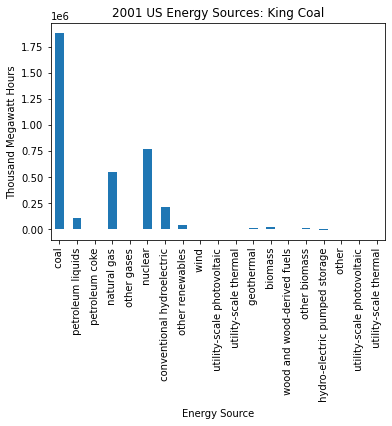

In [111]:
# Filter the dataframe down to only columns used in the chart
us_energy_01=us_df[["Energy_Source", "2001"]]
source_01=us_energy_01.set_index("Energy_Source")
# us_energy_01["2001"].astype(int)
source_01

megawatts=pd.to_numeric(source_01["2001"])
megawatts.plot(kind="bar")
plt.title("2001 US Energy Sources: King Coal")
plt.xlabel("Energy Source")
plt.ylabel("Thousand Megawatt Hours")

Text(0, 0.5, 'Thousand Megawatt Hours')

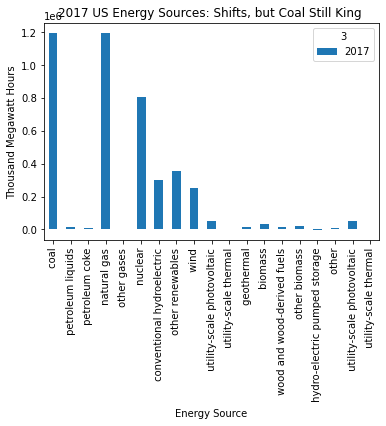

In [123]:
us_energy_17=us_df[["Energy_Source", "2017"]]
source_17=us_energy_17.set_index("Energy_Source")
source_17.plot(kind="bar")

plt.title("2017 US Energy Sources: Shifts, but Coal Still King ")
plt.xlabel("Energy Source")
plt.ylabel("Thousand Megawatt Hours")

Text(0, 0.5, 'Thousand Megawatt Hours')

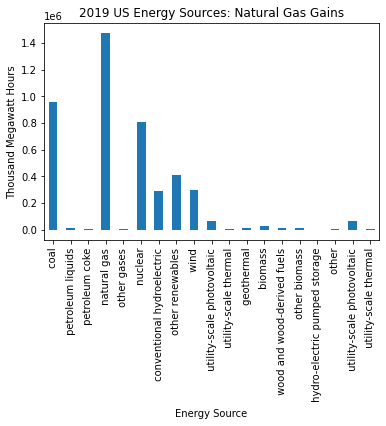

In [125]:
us_energy_19=us_df[["Energy_Source", "2019"]]
source_19=us_energy_19.set_index("Energy_Source")
megawatts=pd.to_numeric(source_19["2019"])
megawatts.plot(kind="bar")
plt.title("2019 US Energy Sources: Natural Gas Gains")
plt.xlabel("Energy Source")
plt.ylabel("Thousand Megawatt Hours")

In [179]:
# drop extra columns
us_condensed_df=us_df.drop(columns=['Location','units', 'source key', "Renewable"])

# set index to energy source
us_condensed_df=us_condensed_df.set_index("Energy_Source")
us_condensed_df

3,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Energy_Source,,,,,,,,,,,,,,,,,,,
coal,1882826,1910613,1952714,1957188,1992054,1969737,1998390,1968838,1741123,1827738,1717891,1500557,1567722,1568774,1340993,1229663,1197838,1142173,958732
petroleum liquids,110260,75079,98593,95770,95667,41665,46970,30226,24341,22375,15343,12649,13207,17485,16626,12429,11848,15595,11080
petroleum coke,8889,14654,15105,18908,20814,18043,14336,12655,11471,12304,12859,7423,11303,10558,9879,10282,8192,8333,6238
natural gas,554940,607683,567303,627172,683829,734417,814752,802372,841006,901389,926290,1132791,1028949,1033172,1237656,1279380,1196753,1365822,1477042
other gases,586,1970,2647,3568,3777,4254,4042,3200,3058,2967,2939,2984,4322,3358,3715,3912,4126,4086,4037
nuclear,768826,780064,763733,788528,781986,787219,806425,806208,798855,806968,790204,769331,789016,797166,797178,805694,804950,807084,809409
conventional hydroelectric,213749,260491,271512,265064,267040,286254,245843,253096,271506,258455,317531,273859,265058,258046,247636,266326,298711,291148,286652
other renewables,42259,47555,49481,52328,56654,65934,74705,97084,116477,138883,163886,188081,221461,247305,263306,309717,354449,382591,409035
wind,6737,10354,11187,14144,17811,26589,34450,55363,73886,94636,120121,140749,167742,181496,190547,226790,254074,272396,294628


In [182]:
# plt.plot()
# Energy_Source= us_condensed_df[us_condensed_df["Energy_Source"]]
# us_condensed_df.plot
# years=np.arange(2001, 2020,1)
# plt.show()
# plt.plot(us_condensed_df)
# us_energy_sources=plt.plot(years, index)

In [183]:
sources=us_df["Energy_Source"]
years=np.arange(2001, 2020,1)
sources
# megawatts=us_df(years)
# plt.plot

7                               coal
8                  petroleum liquids
9                     petroleum coke
10                       natural gas
11                       other gases
12                           nuclear
13        conventional hydroelectric
14                  other renewables
15                              wind
17        utility-scale photovoltaic
18             utility-scale thermal
19                        geothermal
20                           biomass
21       wood and wood-derived fuels
22                     other biomass
23     hydro-electric pumped storage
24                             other
28        utility-scale photovoltaic
29             utility-scale thermal
Name: Energy_Source, dtype: object

In [192]:
### New England Analysis
# The New England Region is classified by the EIA as including:
# Connecticut
# Maine
# Massachusetts
# New Hampshire
# Rhode Island
# Vermont

In [294]:
new_england= filtered_df[filtered_df['Location']=='New England']
new_england

3,Location,Energy_Source,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
32,New England,coal,18636,18662,19201,19021,20218,19411,19791,18574,...,6801,4061,6114,4957,3838,2535,1679,1046,457,non-renewable
33,New England,petroleum liquids,14952,9832,12404,11386,11967,3853,5018,2875,...,494,319,995,2034,1928,639,693,1190,139,non-renewable
35,New England,natural gas,32278,42044,44214,46957,48287,50415,51499,48215,...,60121,59102,48573,45333,51942,51598,48803,49022,46655,non-renewable
37,New England,nuclear,33436,33944,34776,36513,34565,36923,36974,35547,...,34283,36116,37183,36839,31890,32751,31537,31385,29818,non-renewable
38,New England,conventional hydroelectric,4460,5222,6102,6805,7973,8574,6095,8496,...,7943,6915,7225,7117,6503,5835,7081,7459,7587,renewable
39,New England,other renewables,5419,5019,4961,4854,5238,5338,5821,5773,...,5926,6316,7151,8086,8791,9309,10071,10109,9765,renewable
40,New England,wind,12,10,11,11,11,11,110,156,...,861,1284,1866,2020,2234,2618,3414,3524,3701,renewable
45,New England,biomass,5407,5008,4950,4843,5227,5327,5711,5617,...,5059,4998,5160,5720,6029,5990,5718,5359,4568,renewable
46,New England,wood and wood-derived fuels,2938,2652,2669,2597,3068,2993,3455,3328,...,2961,2902,3210,3612,3999,3932,3751,3439,2764,non-renewable
47,New England,other biomass,2469,2356,2282,2246,2158,2334,2257,2289,...,2098,2097,1951,2108,2030,2058,1968,1920,1804,renewable


In [292]:
#new_england_energy=new_england[["Energy_Source", "2001"]]
# ne_01=new_england_energy.set_index("Energy_Source")
year=np.arange(2001, 2020,1)
new_england.plot(kind="scatter", "year", y= "Energy_Source")



# us_energy_01["2001"].astype(int)
# ne_01.plot
# ne_01
# megawatts=pd.to_numeric(source_01["2001"])
# megawatts.plot(kind="bar")
#plt.title("2001 US Energy Sources: King Coal")
#plt.xlabel("Energy Source")
#plt.ylabel("Thousand Megawatt Hours")

SyntaxError: positional argument follows keyword argument (<ipython-input-292-926960ed391b>, line 4)

KeyError: "None of [Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,\n            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],\n           dtype='int64', name=3)] are in the [columns]"

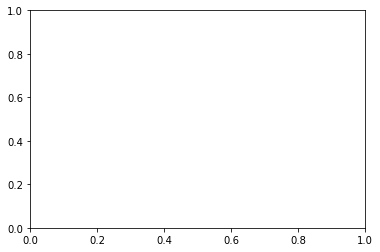

In [249]:
# year=np.arange(2001, 2020,1)

# new_england.plot(kind= 'scatter', x= year, y='Energy_Source' )
#new_england.plot(kind='scatter', x= 'year', y= 'megawatts')

In [261]:
# Summary table of nonrenewable energy vs renewable energy sources in New England from 2001 - 2019
new_england_renewables= new_england.groupby('Renewable')
ne_total=new_england_renewables.sum()
ne_total

3,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Renewable,,,,,,,,,,,,,,,,,,,
non-renewable,104092,109594,115069,118260,119869,115366,118442,110265,105107,113568,106548,104444,97895,94476,95214,93113,88058,87612,81539
renewable,17056,16762,17795,18268,20144,21005,19148,21539,21922,21931,21452,21305,22984,24600,25109,25315,27811,27911,26991


In [298]:
ne_total.plot

In [270]:
# Line chart of renewable vs nonrenewable energy use in New England 
# Need to set years as x axis, megawatts as y axis, with two lines 

# ne_total = pd.to_numeric(ne_total, errors= "ignore")

year=np.arange(2001, 2020,1)
#megawatts= ne_total[['Renewable']]
#megawatts=ne_total[['non-renewable', 'renewable']]
ne_total.plot(kind='line', x=year)

#ne_total.plot(kind="bar")

#ne_total.plot(kind='line', x= ne_total, y='year')

#energy_source= new_england[['Renewable']]

#energy_source=ne_total[['Renewable']]
# plt.scatter(year, energy_source)
plt.show()

#nonrenewable= ne_total('non-renewable')
#renewable= ne_total('renewable')



# df= pd.DataFrame({
#     'non-renewable': nonrenewable,
#     'renewable': renewable
# })
# lines=df.plot.line()



#renewables= new_england("renewable")
#nonrenewables= new_england("non-renewable")
#ne_total.plot()


# ne_renewables= ne_total("renewable")
# ne_nonrenewables= ne_total("non-renewable")
#plt.plot(ne_renewables)
#plt.plot(ne_nonrenewables)

# ne_energy= ne_total
#years=np.arange(2001, 2020,1)

#plt.plot(years, ne_energy)
#plt.plot


#ne_total.plot('renewable', years)


# ne_energy=ne_total(['non-renewable', 'renewable'])



# plt.plot(ne_total)
#plt.plot(ne_total, years)
# ne_total.plot
# plt.show()

KeyError: "None of [Int64Index([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,\n            2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],\n           dtype='int64', name=3)] are in the [columns]"

In [198]:
ne_table= new_england_renewables.T
ne_table=ne_table.drop(['Location'])
ne_table

AttributeError: 'DataFrameGroupBy' object has no attribute 'T'

In [272]:
# Focus on Connecticut 
conn= filtered_df[filtered_df['Location']=='Connecticut']
conn

3,Location,Energy_Source,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
57,Connecticut,coal,3736,3227,4200,4255,3996,4282,3739,4387,...,526,653,681,825,600,177,198,330,53,non-renewable
58,Connecticut,petroleum liquids,5124,2308,1988,1614,3039,1231,1295,506,...,161,108,302,501,418,87,174,335,6,non-renewable
60,Connecticut,natural gas,3840,8539,4815,7968,8744,10215,9744,7828,...,14750,15808,14872,13822,16500,17045,14928,18935,20249,non-renewable
62,Connecticut,nuclear,15428,14918,16078,16539,15562,16589,16386,15433,...,15928,17078,17080,15841,17411,16575,16500,16881,16733,non-renewable
63,Connecticut,conventional hydroelectric,286,335,564,463,478,544,363,556,...,567,312,402,434,302,224,332,555,428,renewable
64,Connecticut,other renewables,909,821,786,758,753,763,730,734,...,660,667,626,748,801,893,844,872,895,renewable
70,Connecticut,biomass,909,821,786,758,753,763,730,734,...,660,667,626,736,784,856,792,756,749,renewable
71,Connecticut,wood and wood-derived fuels,0,0,0,5,7,9,2,2,...,1,1,2,105,190,237,208,261,268,non-renewable
72,Connecticut,other biomass,909,821,786,752,746,755,728,732,...,659,666,624,631,594,619,584,495,481,renewable
73,Connecticut,hydro-electric pumped storage,0,-10,0,8,-2,0,-15,7,...,6,3,-1,7,-4,6,2,3,2,renewable


In [273]:
conn_renewables= conn.groupby('Renewable')
conn_total=conn_renewables.sum()
conn_total

3,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Renewable,,,,,,,,,,,,,,,,,,,
non-renewable,28997,29796,27861,31132,32078,33052,31878,28853,29606,31819,32070,34404,33625,31680,35672,34698,32555,37207,37887
renewable,3013,2788,2922,2739,2728,2825,2536,2763,2791,2619,2552,2315,2277,2556,2477,2598,2554,2681,2555


In [276]:
# Focus on Maine
maine= filtered_df[filtered_df['Location']=='Maine']
maine

3,Location,Energy_Source,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
82,Maine,coal,189,242,223,203,163,157,147,155,...,38,30,35,49,65,60,58,56,61,non-renewable
83,Maine,petroleum liquids,1108,434,1253,726,899,74,387,175,...,90,65,205,262,512,99,117,171,20,non-renewable
85,Maine,natural gas,9982,11817,7921,8461,7106,5868,4957,5267,...,4850,4057,2906,3352,2517,3157,1915,1878,1295,non-renewable
88,Maine,conventional hydroelectric,1710,1831,2150,2867,3466,3499,3044,3695,...,3231,3320,3124,3231,2971,2678,3025,3147,3387,renewable
89,Maine,other renewables,1833,1666,1646,1602,2020,1991,2136,2027,...,2421,2468,2642,2724,3112,3290,3919,3885,3536,renewable
95,Maine,biomass,1833,1666,1646,1602,2020,1991,2037,1895,...,1714,1581,1595,1627,1816,1623,1580,1489,1035,renewable
96,Maine,wood and wood-derived fuels,1703,1534,1520,1465,1878,1843,1911,1780,...,1572,1439,1499,1539,1740,1542,1506,1411,965,non-renewable
97,Maine,other biomass,131,132,127,137,143,148,127,116,...,142,143,96,87,76,81,75,77,70,renewable
99,Maine,other,153,229,167,172,203,203,186,198,...,261,245,195,186,146,174,173,172,162,non-renewable


In [275]:
maine_renewables= maine.groupby('Renewable')
maine_total=maine_renewables.sum()
maine_total

3,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Renewable,,,,,,,,,,,,,,,,,,,
non-renewable,13135,14256,11084,11027,10249,8145,7588,7575,7539,8137,6811,5836,4840,5388,4980,5032,3769,3688,2503
renewable,5507,5295,5569,6208,7649,7629,7344,7733,7627,7703,7508,7512,7457,7669,7975,7672,8599,8598,8028


In [277]:
# Focus on Massachusetts
mass= filtered_df[filtered_df['Location']=='Massachusetts']
mass

3,Location,Energy_Source,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
107,Massachusetts,coal,11005,11471,10855,10487,11986,11086,11978,10582,...,4029,2110,3934,2772,2236,1875,1136,0,0,non-renewable
108,Massachusetts,petroleum liquids,8239,6467,7125,7140,6739,2162,2955,2047,...,168,113,358,924,738,403,248,446,86,non-renewable
110,Massachusetts,natural gas,11080,15286,21998,20538,19854,22691,24338,20928,...,25361,24091,20638,17894,20390,20464,21423,17554,14620,non-renewable
112,Massachusetts,nuclear,5144,5769,4978,5939,5475,5830,5120,5869,...,5085,5860,4331,5769,4995,5414,5047,4442,2177,non-renewable
113,Massachusetts,conventional hydroelectric,694,865,1064,993,1041,1504,778,1142,...,1137,903,982,891,817,708,1028,1130,970,renewable
114,Massachusetts,other renewables,1289,1246,1229,1214,1234,1252,1214,1254,...,1193,1266,1432,1696,1801,1975,2123,2309,2317,renewable
120,Massachusetts,biomass,1289,1246,1229,1214,1234,1252,1214,1250,...,1137,1157,1137,1198,1166,1177,1132,1139,978,renewable
121,Massachusetts,wood and wood-derived fuels,130,107,120,114,120,125,119,123,...,101,101,77,125,120,129,131,107,92,non-renewable
122,Massachusetts,other biomass,1159,1140,1109,1100,1114,1126,1094,1128,...,1036,1055,1060,1072,1046,1048,1001,1032,886,renewable
123,Massachusetts,hydro-electric pumped storage,-711,-843,-511,-498,-462,-579,-831,-798,...,-440,-308,-368,-458,-474,-500,-443,-464,-436,renewable


In [278]:
mass_renewables= mass.groupby('Renewable')
mass_total=mass_renewables.sum()
mass_total

3,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Renewable,,,,,,,,,,,,,,,,,,,
non-renewable,36369,39879,45874,45019,44946,42676,45258,40322,36488,40345,35604,33152,30214,28362,29347,29143,28812,23395,17887
renewable,3720,3654,4120,4023,4161,4555,3469,3976,4200,4295,4063,4073,4243,4399,4356,4408,4841,5146,4715


In [279]:
# Focus on New Hampshire
new_h= filtered_df[filtered_df['Location']=='New Hampshire']
new_h

3,Location,Energy_Source,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
132,New Hampshire,coal,3706,3722,3923,4076,4073,3885,3927,3451,...,2208,1268,1464,1311,937,422,287,660,343,non-renewable
133,New Hampshire,petroleum liquids,429,596,1998,1875,1266,367,353,118,...,57,20,90,271,160,22,91,162,17,non-renewable
135,New Hampshire,natural gas,42,96,4024,5203,6615,5902,5638,7042,...,6631,7005,4055,4343,5998,4689,3540,2953,3542,non-renewable
137,New Hampshire,nuclear,8693,9295,9276,10178,9456,9398,10764,9350,...,8363,8189,10927,10168,9484,10761,9991,10062,10907,non-renewable
138,New Hampshire,conventional hydroelectric,898,1088,1170,1310,1791,1524,1261,1626,...,1600,1247,1427,1381,1270,1145,1413,1355,1462,renewable
139,New Hampshire,other renewables,921,825,794,780,818,737,1123,1175,...,1091,1351,1655,1914,2012,2086,1977,1748,1607,renewable
145,New Hampshire,biomass,921,825,794,780,818,737,1123,1164,...,1025,1142,1266,1503,1589,1654,1565,1341,1174,renewable
146,New Hampshire,wood and wood-derived fuels,754,659,635,624,662,580,970,1009,...,917,1035,1169,1415,1506,1564,1472,1248,1081,non-renewable
147,New Hampshire,other biomass,167,165,159,155,156,156,153,155,...,108,107,97,87,83,89,93,93,93,renewable
149,New Hampshire,other,59,60,60,63,58,59,59,58,...,64,66,61,50,50,49,49,48,55,non-renewable


In [280]:
new_h_renewables= new_h.groupby('Renewable')
new_h_total=new_h_renewables.sum()
new_h_total

3,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Renewable,,,,,,,,,,,,,,,,,,,
non-renewable,13683,14428,19916,22019,22130,20191,21711,21028,18219,20468,18240,17583,17766,17558,18135,17507,15430,15133,15945
renewable,2907,2903,2917,3025,3583,3154,3660,4120,4154,3987,3824,3847,4445,4885,4954,4974,5048,4537,4336


In [281]:
# Focus on Rhode Island
rhode_i= filtered_df[filtered_df['Location']=='Rhode Island']
rhode_i

3,Location,Energy_Source,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
158,Rhode Island,petroleum liquids,20,18,17,13,14,12,20,24,...,12,11,37,71,98,24,56,74,9,non-renewable
160,Rhode Island,natural gas,7322,6304,5453,4784,5966,5737,6820,7147,...,8525,8140,6099,5920,6536,6241,6996,7702,6948,non-renewable
163,Rhode Island,conventional hydroelectric,3,4,6,5,7,6,4,5,...,7,4,4,4,3,2,2,4,4,renewable
164,Rhode Island,other renewables,104,98,102,102,0,149,155,158,...,130,102,53,219,229,239,359,391,461,renewable
170,Rhode Island,biomass,104,98,102,102,0,149,155,158,...,127,101,48,207,211,205,203,211,208,renewable
172,Rhode Island,other biomass,104,98,102,102,0,149,155,158,...,127,101,48,207,211,205,203,211,208,renewable


In [282]:
rhode_i_renewables= rhode_i.groupby('Renewable')
rhode_i_total=rhode_i_renewables.sum()
rhode_i_total

3,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Renewable,,,,,,,,,,,,,,,,,,,
non-renewable,7342,6322,5470,4797,5980,5749,6840,7171,7495,7563,8537,8151,6136,5991,6634,6265,7052,7776,6957
renewable,315,298,312,311,7,453,469,479,440,418,391,308,153,637,654,651,767,817,881


In [283]:
# Focus on Vermont
vermont= filtered_df[filtered_df['Location']=='Vermont']
vermont

3,Location,Energy_Source,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Renewable
183,Vermont,petroleum liquids,32,9,23,18,10,7,8,4,...,6,2,4,4,2,4,7,3,1,non-renewable
185,Vermont,natural gas,11,3,2,3,2,2,2,3,...,3,3,3,2,1,1,1,1,1,non-renewable
187,Vermont,nuclear,4171,3963,4444,3858,4072,5107,4704,4895,...,4907,4989,4846,5061,0,0,0,0,0,non-renewable
188,Vermont,conventional hydroelectric,868,1099,1148,1166,1190,1497,645,1472,...,1401,1128,1286,1175,1139,1078,1280,1268,1337,renewable
189,Vermont,other renewables,363,362,405,398,413,446,464,425,...,431,463,742,785,836,825,850,904,949,renewable
190,Vermont,wind,12,10,11,11,11,11,11,10,...,33,107,236,311,325,291,305,373,377,renewable
195,Vermont,biomass,351,352,394,387,402,436,453,415,...,396,351,489,450,463,475,446,424,424,renewable
196,Vermont,wood and wood-derived fuels,351,352,394,387,402,436,453,415,...,370,325,463,427,444,460,434,412,357,non-renewable


In [284]:
vermont_renewables= vermont.groupby('Renewable')
vermont_total= vermont_renewables.sum()
vermont_total

3,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Renewable,,,,,,,,,,,,,,,,,,,
non-renewable,4565,4327,4863,4266,4486,5552,5167,5317,5760,5234,5286,5319,5316,5494,447,465,442,416,359
renewable,1594,1823,1958,1962,2016,2390,1573,2322,2319,2286,2261,2049,2753,2721,2763,2669,2881,2969,3087


In [308]:
# plt.hist(vermont_total.loc[:,:], bins= 50)
#vermont_total.loc[['non-renewable', 'renewable'], :].plot(kind='line', x=years, y=['megawatts'])

In [187]:
# cols = list(filtered_df.columns.values)
# cols

In [186]:
# year=np.arange(2001, 2020,1)
# source= us_df["Energy_Source"].unique()
# source
# us_energy=plt.plot(year, source)

In [31]:
#renewable_us_energy
#plt.show()

In [ ]:
# megawatts=pd.to_numeric(us_energy_01["2001"])

# us_energy_01.plot.bar(source_01, megawatts)



# us_01.set_index("Energy_Source")
# us_01


# us_energy_01
# us_energy_01.dtypes
# us_energy_01.head(19)
# us_01= us_energy_01.plot.bar(x="Energy_Source")
# us_01
# us_01=us_energy_01["2001"].count()
# us_01.plot(kind="bar")
# plt.show()

# plt.bar(us_01, us_energy_01)
#plt.show()


# us_energy_01.plot(kind="bar")

# us_energy_01

#us_energy_01_source=us_df["Energy_Source"]
# us_energy_01_source
# x_axis=np.arange(len(us_energy_01_source))
# plt.bar(us_energy_01_source, us_energy_01)
# plt.show()
#us_energy_01=us_df.groupby(["Energy_Source", "2001"])

In [146]:
# Change columns to numeric and drop extra columns
# filtered_df=filtered_df.apply(pd.to_numeric, errors="ignore")
# filtered_df=filtered_df.drop(columns=["source key", "units"])
# filtered_df

In [ ]:

# us_energy= state_energy(state_energy(["Location"]=="United States"))


#us_energy=state_energy[(state_energy["Location"]=="United States")]
# state_energy.head()

In [ ]:
# state_energy=energy_df.groupby("Location")
# state_energy.Location.unique()

In [ ]:
# energy_df.count()

In [ ]:
#energy_sources = energy_df['Energy_Source'].tolist()
#print(energy_sources)

In [ ]:
#def movecol(energy_date_df, cols_to_move=["Energy_Source"], ref_col = "description", place = "After"):
    #cols = energy_date_df.columns.tolist()


#energy_data= energy_date_df.movecol(energy_date_df,
#                     cols_to_move = ['Energy_Source'],
#                     ref_col = 'description',
#                     place='After')
#energy_data

In [ ]:
# Group energy sources by renewables and nonrenewables 
# renewables = ["conventional hydroelectric", "other renewables", "wind", "all utility-scale solar", "biomass", "wood and wood-derived fuels", "other biomass", "hydro-electric pumped storage", "all solar", "small-scale solar photovoltaic"]
# nonrenewables = ["coal", "petroleum liquids", "petroleum coke", "natural gas", "other gases"]

In [ ]:
#energy_date_df=energy_date_df.reset_index(drop=True)
# energy_date_df=df.drop([0, 1, 2, 4])
# energy_date_df.columns= energy_date_df.iloc[header_row]
#energy=energy_date_df.replace('NaN', 'Energy_Source')
#energy

#energy_df=energy_date_df.insert('description', 'units', 'source key', 'None')
# energy_df
#energy_data = energy_date_df['None']
#energy_data
#energy_data=energy_date_df.rename(columns={np.nan: "Fuel Source"}, inplace = True)
#energy_data
#energy_data= energy_date_df.columns.fillna("Fuel Source")
#energy_data
#energy_df.columns.get_loc("Energy_Source")